# Exploratory data analysis

In [1]:
import pandas as pd

## Load PL df and set headers

In [3]:
df_pol = pd.read_csv('/data/raw/PL.txt', delimiter="\t")
# df_pol.to_csv('PL.csv')
geonames_headers = [
    "geonameid", "name", "asciiname", "alternatenames", "latitude", "longitude", 
    "feature_class", "feature_code", "country_code", "cc2", "admin1_code", 
    "admin2_code", "admin3_code", "admin4_code", "population", "elevation", 
    "dem", "timezone", "modification_date"
]
df_pol.columns=geonames_headers
df_pol.head()

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
0,477032,Variazhanka,Variazhanka,"Mlynski Potok,Młyński Potok,Varenzhanka,Varezh...",50.63333,24.16667,H,STM,PL,NaN,0.0,NaN,NaN,NaN,0,NaN,179,Europe/Warsaw,2021-08-04
1,490932,Sołokija,Solokija,"Fluss Solokija,Fluss Sołokija,Reka Solokiya,Ri...",50.38333,24.25000,H,STM,PL,NaN,0.0,NaN,NaN,NaN,0,NaN,182,Europe/Warsaw,2025-01-10
2,502656,Rata,Rata,"Rata,Рата",50.35148,24.24569,H,STM,PL,"PL,UA",0.0,NaN,NaN,NaN,0,NaN,189,Europe/Warsaw,2023-11-07
3,558461,Hrodzyenskaye Uzvyshsha,Hrodzyenskaye Uzvyshsha,"Grodnenskaya Vozvyshennost',Grodnenskaya Vozvy...",53.66514,23.54748,T,HLLS,PL,NaN,81.0,2011.0,201106.0,NaN,0,NaN,131,Europe/Warsaw,2010-09-15
4,570570,Kanal Butsovskiy,Kanal Butsovskiy,"Kanal Bucowski,Kanal Butsovski,Kanal Butsovski...",49.95000,22.93333,H,CNL,PL,UA,80.0,NaN,NaN,NaN,0,NaN,184,Europe/Warsaw,2014-03-05


## Szukanie zamieszkałych lokalizacji

### Kategorie lokalizacji z zerowa populacja
Kazda kategoria lokalizacji posiada jakies miejsca z zerowa pop

In [4]:
df_pol[df_pol.population==0]['feature_class'].unique()

array(['H', 'T', 'P', 'S', 'V', 'A', 'L', 'R', 'U'], dtype=object)

### Kategorie lokalizacji z niezerowa populacja

In [5]:
df_pol[df_pol.population>0]['feature_class'].unique()

array(['P', 'A', 'L', 'S'], dtype=object)

Niezerowa populacja wystepuje w przypadku:
- P: miast, wsi
- A: kraj, wojewodztwo, region
- L: park, obszar
- S: miejsce, budynek, farma

In [6]:
df_pol[df_pol.population>0]['feature_code'].unique()

array(['PPL', 'PPLA3', 'PPLA2', 'PPLC', 'ADMD', 'PPLX', 'PPLA', 'PPLF',
       'PCLI', 'ADM1', 'RGN', 'ADM2', 'ADM4H', 'PPLA4', 'HTL', 'ADM3',
       'AREA', 'FRM', 'PPLH', 'BLDG'], dtype=object)

Oto lista kodów oznaczających obszary zamieszkane na podstawie danych z Twojego dataframe'u:

- PPL – miejscowość (miasto, wieś lub inna zamieszkana osada)
- PPLA – stolica jednostki administracyjnej pierwszego rzędu (np. województwa)
- PPLA2 – stolica jednostki administracyjnej drugiego rzędu (np. powiatu)
- PPLA3 – stolica jednostki administracyjnej trzeciego rzędu (np. gminy)
- PPLA4 – stolica jednostki administracyjnej czwartego rzędu
- PPLC – stolica kraju
- PPLF – wieś rolnicza
- PPLH – historyczna miejscowość (kiedyś zamieszkana, obecnie opuszczona)
- PPLX – część miejscowości

Inne kody w Twoim zbiorze danych, które niekoniecznie oznaczają obszary zamieszkane:

- ADMD, ADM1, ADM2, ADM3, ADM4H – jednostki administracyjne różnego szczebla
- PCLI – niezależne państwo
- RGN – region geograficzny
- AREA – obszar
- FRM – farma
- BLDG – budynek
- HTL – hotel

### Jakie mamy klasy w kategorii P?

In [3]:
df_pol[df_pol.feature_class =="P"]['feature_code'].unique()

array(['PPL', 'PPLX', 'PPLA3', 'PPLA2', 'PPLQ', 'PPLC', 'PPLA', 'PPLF',
       'PPLL', 'PPLA4', 'PPLS', 'PPLR', 'PPLH', 'PPLW'], dtype=object)

#### W spopulowanych miejscach nie wystapily:
- PPLQ - abandoned populated place
- PPLL - populated locality
- PPLS - populated places
- PPLR - religious populated place
- PPLW - destroyed populated place

In [8]:
df_pol[df_pol.feature_code == "PPLL"]

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
21962,775016,Brzuze Duże,Brzuze Duze,"Brzoze Duze,Brzuze Duze,Brzuze Duże,Brzóze Duże",52.82119,21.45797,P,PPLL,PL,NaN,78.0,1411.0,141108.0,NaN,0,NaN,95,Europe/Warsaw,2017-10-12
34858,3090999,Niedźwiedzi Ług,Niedzwiedzi Lug,NaN,52.27320,15.14238,P,PPLL,PL,NaN,76.0,807.0,80705.0,NaN,0,NaN,91,Europe/Warsaw,2016-03-02
48723,6354921,Sołtysi Koniec,Soltysi Koniec,NaN,50.30696,20.01506,P,PPLL,PL,NaN,77.0,1208.0,120805.0,NaN,0,275.0,266,Europe/Warsaw,2023-06-22
49096,6698046,Brzeźniak,Brzezniak,"Birkholz,Brzezniak,Brzeźniak",53.14749,16.07353,P,PPLL,PL,NaN,87.0,3217.0,321702.0,NaN,0,NaN,93,Europe/Warsaw,2015-09-05
53638,8379168,Ulicko,Ulicko,"Bergstrass,Bergstraß",50.92349,15.28284,P,PPLL,PL,NaN,72.0,210.0,21002.0,NaN,0,NaN,516,Europe/Warsaw,2012-08-29
54438,8630240,Naborów,Naborow,NaN,51.27714,16.65918,P,PPLL,PL,NaN,72.0,222.0,22201.0,NaN,0,NaN,138,Europe/Warsaw,2013-11-12
54440,8630269,Borzymówka,Borzymowka,NaN,52.12490,20.20154,P,PPLL,PL,NaN,78.0,1428.0,142805.0,NaN,0,NaN,88,Europe/Warsaw,2013-11-12
54597,8740564,Otręba,Otreba,"Buch-Muehle,Buch-Mühle",52.37377,15.30325,P,PPLL,PL,NaN,76.0,808.0,80802.0,NaN,0,NaN,120,Europe/Warsaw,2014-05-05
54602,8740569,Gronowiec,Gronowiec,"Grunower Muehle,Grunower Mühle",52.29722,15.27227,P,PPLL,PL,NaN,76.0,808.0,80802.0,NaN,0,NaN,113,Europe/Warsaw,2014-05-05
54618,8740585,Wągieł,Wagiel,"Schaeferei,Schäferei",52.28433,15.43927,P,PPLL,PL,NaN,76.0,808.0,80801.0,NaN,0,NaN,78,Europe/Warsaw,2015-08-20


### Czy sa hotele z populacja ponad 0?
Zadanie okresla aby znalezc miejsca zamieszkale, ale nie np. hotele czy latarnie morskie

In [7]:
df_pol[(df_pol.feature_code=="HTL") & (df_pol.population>0)]

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
48726,6452689,Losie,Losie,Agroturystczny Dom Gosi,49.56586,21.10783,S,HTL,PL,NaN,77.0,1205.0,120508.0,NaN,122,100.0,571,Europe/Warsaw,2015-09-05


### Zostajemy przy **miastach, miasteczkach, i wsiach (klasa P)**
Ponieważ należa one zazwyczaj do jednostek administracyjnych (klasa A), czasem tez do obszarow (klasa L) oraz zawieraja w sobie miejsca jak budynki czy hotele (klasa S)

In [8]:
df_pol[df_pol["feature_class"]=='P']

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
5,620115,Włodawka,Wlodawka,"Vlodavka,Wlodawka,Włodawka",51.53333,23.56667,P,PPL,PL,NaN,75.0,619.0,61906.0,NaN,0,NaN,154,Europe/Warsaw,2020-06-10
6,688812,Vul’ka Ugruska,Vul'ka Ugruska,"Vul'ka Ugruska,Vul’ka Ugruska,Wolka Uhruska,Wó...",51.32150,23.62724,P,PPL,PL,NaN,0.0,NaN,NaN,NaN,0,NaN,173,Europe/Warsaw,2021-07-27
7,696099,Pshedmes’tse Vel’ke,Pshedmes'tse Vel'ke,"Bol'shoy Predmest'ye,Bol’shoy Predmest’ye,Pshe...",50.23333,23.06667,P,PPL,PL,NaN,0.0,NaN,NaN,NaN,0,NaN,243,Europe/Warsaw,2021-04-16
8,698000,Paportno,Paportno,Paportno,49.59996,22.69709,P,PPL,PL,NaN,80.0,1813.0,181303.0,NaN,0,NaN,437,Europe/Warsaw,2019-05-18
9,707872,Gurne,Gurne,"Gorne,Gurne,Górne",50.04389,22.99222,P,PPL,PL,NaN,80.0,1804.0,180405.0,NaN,0,NaN,207,Europe/Warsaw,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58184,13118922,Karpiny,Karpiny,Treugenkohl,53.64874,18.85904,P,PPL,PL,NaN,82.0,2207.0,220706.0,NaN,0,NaN,57,Europe/Warsaw,2024-11-14
58185,13132183,Kostrzyca,Kostrzyca,NaN,50.81906,15.80757,P,PPL,PL,NaN,72.0,206.0,20607.0,NaN,0,NaN,403,Europe/Warsaw,2024-11-27
58186,13132269,Trzebieradz,Trzebieradz,NaN,54.02076,14.96106,P,PPL,PL,NaN,87.0,3207.0,320705.0,NaN,0,NaN,9,Europe/Warsaw,2024-11-28
58187,13157303,Żerdziny,Zerdziny,NaN,50.09702,18.15266,P,PPL,PL,NaN,83.0,2411.0,241107.0,NaN,0,NaN,247,Europe/Warsaw,2025-01-08


# Problemy z danymi i czyszczenie

### Rzeka o tej samej nazwie występuje dwa razy
Raz jako rzeka, raz jako miejscowość.

Lokalizacja jest zbliżona, lecz nie taka sama.

Nazwa jest ta sama.

Kody administracyjne s te same.

Dem różni się o 1 jednostkę.



In [15]:
df_pol[df_pol["asciiname"]=='Lagiewniki']

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
13833,766839,Łagiewniki,Lagiewniki,NaN,50.62300,20.79987,P,PPL,PL,NaN,84.0,2604.0,260404.0,NaN,0,NaN,251,Europe/Warsaw,2010-10-01
13834,766840,Łagiewniki,Lagiewniki,"Lagiewniki,Łagiewniki",50.48619,20.74743,P,PPL,PL,NaN,84.0,2601.0,260101.0,NaN,0,NaN,248,Europe/Warsaw,2019-02-22
37831,3093992,Łagiewniki,Lagiewniki,"Elvershagen,Lagiewniki,Łagiewniki",53.74378,15.49559,P,PPL,PL,NaN,87.0,3218.0,321804.0,NaN,0,NaN,74,Europe/Warsaw,2022-04-12
37832,3093993,Łagiewniki,Lagiewniki,NaN,52.56059,19.05218,P,PPL,PL,NaN,73.0,418.0,41813.0,NaN,0,NaN,72,Europe/Warsaw,2015-09-05
37833,3093994,Łagiewniki,Lagiewniki,"Lagiewniki,Łagiewniki",52.53952,17.24990,P,PPL,PL,NaN,86.0,3021.0,302112.0,NaN,0,NaN,108,Europe/Warsaw,2019-02-22
37834,3093995,Łagiewniki,Lagiewniki,"Lagiewniki,Łagiewniki",52.50000,16.86667,P,PPL,PL,NaN,86.0,3021.0,302115.0,NaN,0,NaN,98,Europe/Warsaw,2019-02-22
37835,3093996,Łagiewniki,Lagiewniki,"Lagiewniki,Łagiewniki",52.15513,16.60473,P,PPL,PL,NaN,86.0,3011.0,301103.0,NaN,0,NaN,68,Europe/Warsaw,2019-02-22
37836,3093997,Łagiewniki,Lagiewniki,NaN,52.06215,18.03174,P,PPL,PL,NaN,86.0,3010.0,301002.0,NaN,0,NaN,99,Europe/Warsaw,2010-10-16
37837,3093998,Łagiewniki,Lagiewniki,"Lagiewniki,Lagiewniki Maly,Łagiewniki,Łagiewniki Mały",51.83732,19.46401,P,PPL,PL,NaN,74.0,1061.0,106101.0,NaN,0,NaN,212,Europe/Warsaw,2012-11-27
37838,3093999,Łagiewniki,Lagiewniki,"Lagiewniki,Łagiewniki",51.76490,17.23745,P,PPL,PL,NaN,86.0,3012.0,301202.0,NaN,0,NaN,116,Europe/Warsaw,2019-02-22


In [10]:
df = df_pol
print(df[df["feature_code"] == "PPLA"][['name','population']].head(20))
# print(df[df["feature_code"] == "AREA"][['name','population']].head(20))

                      name  population
6769               Rzeszów      158382
10179              Olsztyn      171803
12875               Lublin      360044
16231               Kielce      208598
23009            Białystok      291855
24090         Zielona Góra      118433
25289              Wrocław      634893
27734             Szczecin      407811
32048               Poznań      570352
33910                Opole      127676
36978                 Łódź      768755
38636               Kraków      755050
40301             Katowice      317316
42538  Gorzów Wielkopolski      124430
43243               Gdańsk      461865
45803            Bydgoszcz      366452


In [11]:
df_pol[df_pol["feature_class"] == 'P']['name'].duplicated()

5        False
6        False
7        False
8        False
9        False
         ...  
58184    False
58185    False
58186    False
58187     True
58189    False
Name: name, Length: 47583, dtype: bool

In [12]:
df_pol[df_pol["feature_code"] == 'PPLX']

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
29,752954,Żywawoda Szury,Zywawoda Szury,NaN,54.16643,22.86944,P,PPLX,PL,NaN,81.0,2012.0,201203.0,NaN,0,NaN,233,Europe/Warsaw,2015-09-05
30,752955,Żywawoda Stara,Zywawoda Stara,NaN,54.17962,22.86025,P,PPLX,PL,NaN,81.0,2012.0,201203.0,NaN,0,NaN,215,Europe/Warsaw,2015-09-05
31,752956,Żywawoda Pieńki,Zywawoda Pienki,NaN,54.17471,22.88062,P,PPLX,PL,NaN,81.0,2012.0,201203.0,NaN,0,NaN,243,Europe/Warsaw,2015-09-05
89,753014,Zwierzyniec Wielki,Zwierzyniec Wielki,Zwierzyniec Wielki,53.66370,23.19968,P,PPLX,PL,NaN,81.0,2011.0,201101.0,NaN,0,NaN,154,Europe/Warsaw,2015-09-05
90,753015,Zwierzyniec Mały,Zwierzyniec Maly,"Zwierzyniec Maly,Zwierzyniec Mały",53.66225,23.21715,P,PPLX,PL,NaN,81.0,2011.0,201101.0,NaN,0,NaN,159,Europe/Warsaw,2015-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58043,12523044,Węgrzynowo,Wegrzynowo,NaN,52.76309,19.69901,P,PPLX,PL,NaN,78.0,1427.0,142702.0,NaN,0,NaN,127,Europe/Warsaw,2023-04-16
58050,12557472,Klonownica Plac,Klonownica Plac,NaN,52.14290,23.17299,P,PPLX,PL,NaN,75.0,601.0,60105.0,NaN,0,NaN,166,Europe/Warsaw,2023-08-25
58051,12557473,Kolonownica Plac,Kolonownica Plac,NaN,52.13532,23.16006,P,PPLX,PL,NaN,75.0,601.0,60105.0,NaN,0,NaN,178,Europe/Warsaw,2023-08-25
58146,13100477,Orunia Górna-Gdańsk Południe,Orunia Gorna-Gdansk Poludnie,"Higher Orunia and Gdansk South,Higher Orunia a...",54.32491,18.61567,P,PPLX,PL,NaN,82.0,2261.0,226101.0,NaN,19807,NaN,49,Europe/Warsaw,2024-10-08


In [13]:
df_p = df_pol[df_pol["feature_class"] == 'P']  # Filtrujemy tylko miejsca zamieszkane
duplikaty = df_p[df_p["name"].duplicated(keep=False)]  # Filtrujemy duplikaty

# Grupujemy po nazwie i zbieramy geonameid w listę
duplikaty["duplicate_geonameids"] = duplikaty.groupby("name")["geonameid"].transform(lambda x: list(x))

import pandas as pd
pd.set_option("display.max_colwidth", None)  # Aby widzieć pełne listy ID w kolumnie

duplikaty


/var/folders/kd/qh5jdc_d3bv65018mk4x4mw80000gn/T/ipykernel_29488/653814563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplikaty["duplicate_geonameids"] = duplikaty.groupby("name")["geonameid"].transform(lambda x: list(x))


,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date,duplicate_geonameids
12,752937,Zastawie,Zastawie,"Krasniczyn-Zastawie,Kraśniczyn-Zastawie,Zastawie",50.93755,23.34217,P,PPL,PL,NaN,75.0,606.0,60606.0,NaN,0,NaN,198,Europe/Warsaw,2010-10-16,752937
15,752940,Parszywka,Parszywka,"Parszywa,Parszywka",50.41667,20.41667,P,PPL,PL,NaN,84.0,2608.0,260804.0,NaN,0,NaN,320,Europe/Warsaw,2015-09-05,752940
16,752941,Małszewko,Malszewko,"Malschowen,Malschöwen,Malshofen,Malshöfen,Malszewko,Małszewko",53.58333,20.71667,P,PPL,PL,NaN,85.0,2817.0,281703.0,NaN,0,NaN,130,Europe/Warsaw,2015-09-05,752941
17,752942,Poraj,Poraj,"Kolonia Poraj,Poraj",50.89962,23.99191,P,PPL,PL,NaN,75.0,604.0,60403.0,NaN,266,NaN,196,Europe/Warsaw,2010-09-06,752942
20,752945,Żyznów,Zyznow,NaN,50.61667,23.28333,P,PPL,PL,NaN,75.0,620.0,62001.0,NaN,0,NaN,300,Europe/Warsaw,2015-09-05,752945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58175,13118913,Łączno,Laczno,Lanzen,53.63215,16.53295,P,PPL,PL,NaN,87.0,3215.0,321504.0,NaN,0,NaN,166,Europe/Warsaw,2024-11-14,13118913
58178,13118916,Jakubowo,Jakubowo,Jacobsdorf,53.58646,17.48628,P,PPL,PL,NaN,73.0,413.0,41301.0,NaN,0,NaN,157,Europe/Warsaw,2024-11-14,13118916
58179,13118917,Dąbrówka,Dabrowka,Dombrowka,53.65337,17.87497,P,PPL,PL,NaN,73.0,416.0,41606.0,NaN,0,NaN,141,Europe/Warsaw,2024-11-14,13118917
58183,13118921,Glina,Glina,Stangendorf,53.62368,18.76817,P,PPLX,PL,NaN,82.0,2207.0,220706.0,NaN,0,NaN,20,Europe/Warsaw,2024-11-14,13118921


# Mapa

In [ ]:
import folium
import pandas as pd

# Filtrujemy lokalizacje zamieszkane
df_p = df_pol[df_pol["feature_class"].isin(['PPL', 'PPLA', 'PPLA2', 'PPLA'])]
# df_p = df_p[df_p['admin3_code'] == 220401]

# Definiujemy kolory dla różnych typów feature_code
feature_colors = {
    'PPL': 'blue',    # Populated place
    'PPLA': 'red',    # Seat of admin division
    'PPLA2': 'red',
    'PPLA3': 'red',
    'PPLA4': 'red',
    'PPLC': 'purple', # Capital city
    'PPLX': 'green',  # Section of populated place
    'PPLF': 'orange', # Farm village
    'PPLH': 'black',  # Historical populated place
    'PPLW': 'gray'    # Destroyed populated place
}

# Tworzymy mapę centrowaną na Polskę
mapa = folium.Map(location=[52.0, 19.0], zoom_start=6)

# Iterujemy po rekordach i dodajemy markery
for _, row in df_p.iterrows():
    lat, lon = row['latitude'], row['longitude']
    feature_code = row['feature_code']
    color = feature_colors.get(feature_code, 'cadetblue')  # Domyślny kolor
    
    popup_text = f"""
    <b>Nazwa:</b> {row['name']}<br>
    <b>Feature Code:</b> {row['feature_code']}<br>
    <b>Populacja:</b> {row['population']}<br>
    <b>Geoname ID:</b> {row['geonameid']}<br>
    <b>Współrzędne:</b> ({lat}, {lon})<br>
    <b>Admin1 code:</b> {row['admin1_code']} <br>
    <b>Admin2 code:</b> {row['admin2_code']} <br>
    <b>Admin3 code:</b> {row['admin3_code']}
    """
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(mapa)

# Zapisujemy mapę do pliku HTML i otwieramy w przeglądarce
mapa.save("mapa_miejscowosci.html")
print("Mapa została zapisana jako 'mapa_miejscowosci.html'. Otwórz ją w przeglądarce.")


Mapa została zapisana jako 'mapa_miejscowosci.html'. Otwórz ją w przeglądarce.


### Wnioski z mapy Gdańska i okolic
- PPL (niebieski) - dzielnice i obszary Gdańska
- PPLA (czerwony) - stolica województwa / Gdańsk
- PPLX (zielony) - niektore obszary, nie do konca dzielnice - np. Westerplatte, Wisłoujście, Orunia Górna-Gdańsk Płd
- PPLH (czerwony) - miejsca historyczne - np stare miasto
- PPLA2 - np Pruszcz Gdański, czyli stolica powiatu?
- PPLA3 - mniejsza miescina - stolica gimny

**Wyglada na to, że dana lokalizacja nie będzie jednocześnie PPLA% oraz PPL.**


**DODATKOWO, admin_code 1-3 wskazuja na wspolna przynaleznosc lokalizacji do jednostek administracyjnych**

Np. wszystkie dzielnice w Gdansku beda mialy przydzial do tego samego powiatu co sam Gdansk, co pozwala je wyeliminowac. <br>
Konieczne jest wyeliminowanie dzielnic, ponieważ niektóre w większych miastach maja znaczaca populacje, i moglyby byc traktowane jak osobne miejscowosci.

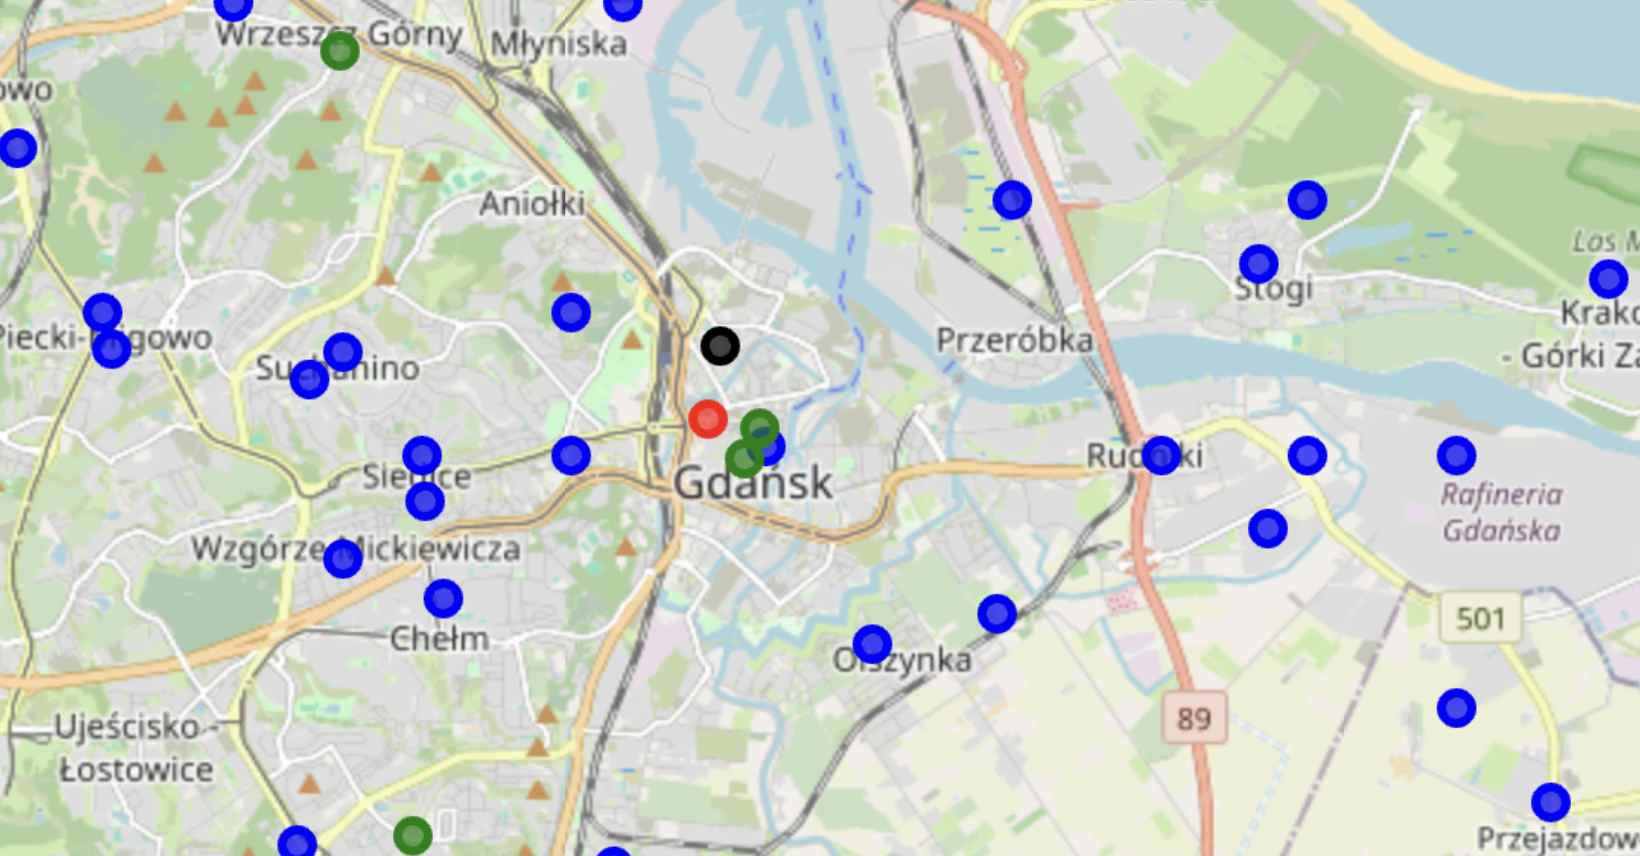

## Podejście oparte na admin_codes

Jednak dla mniejszych miejscowości admin2_code lub admin3_code beda takie same jak u pobliskich małych miejscowości.

**Czyli eliminowanie ze wzgledu na admin_code moze usunac pelnoprawne, oddzielne miejscowosci, <br> natomiast brak filtrowania moze skutkowac traktowaniem dzielnic jak miejscowosci (szczegolnie jak maja niezerowa populacje).**

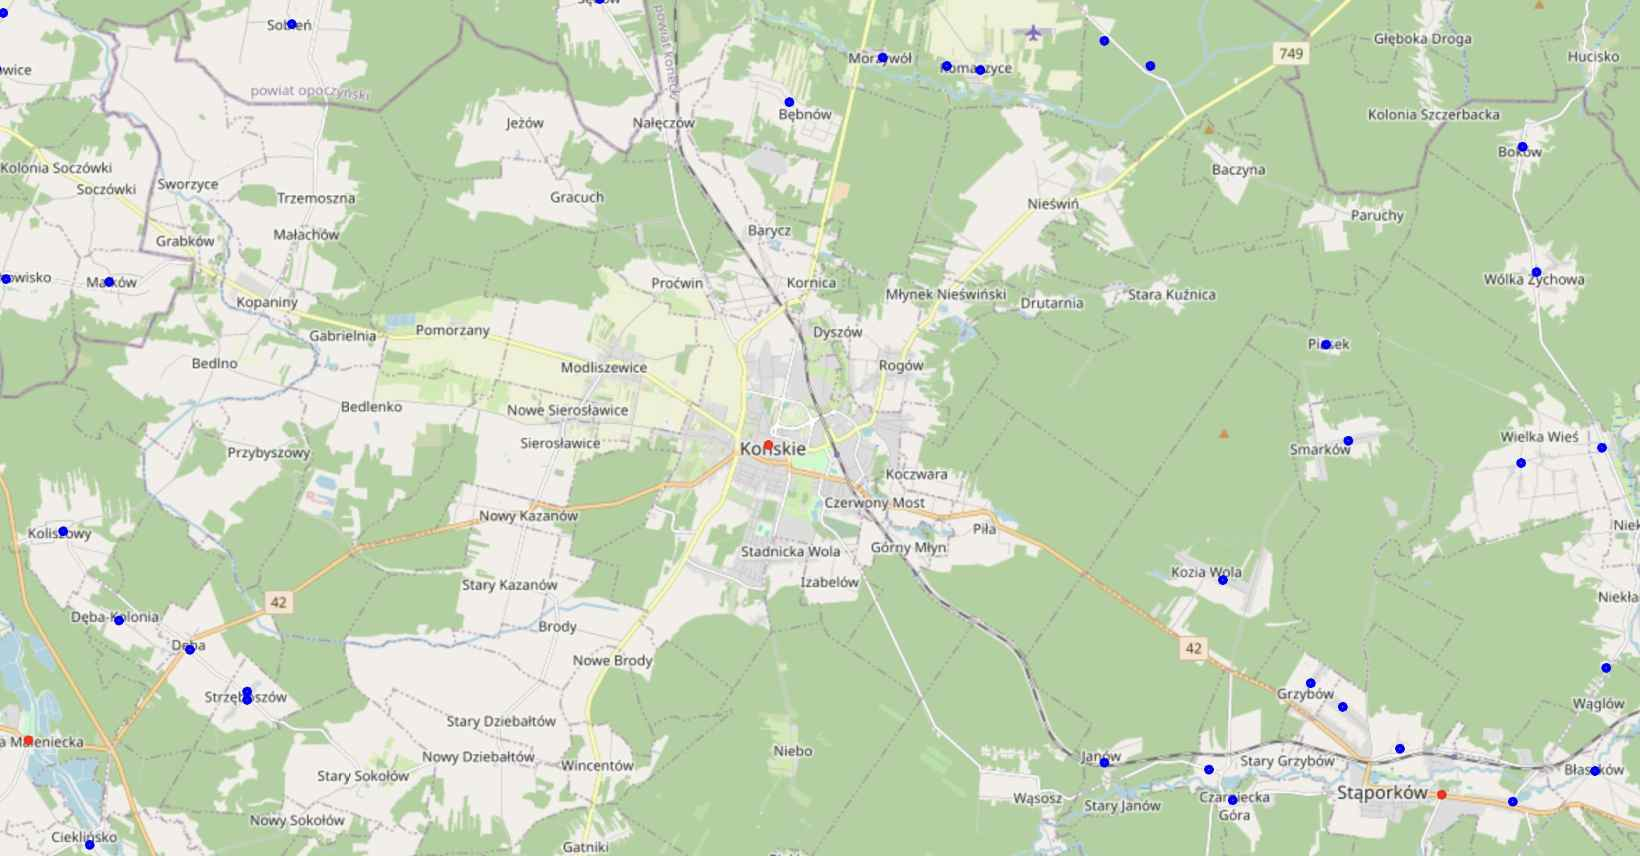

In [ ]:
import pandas as pd
import folium

# Creating DataFrame with only places (P)
df = df_pol[df_pol['feature_class'] == 'P']

# Filtering out PPLH and PPLX
df = df[~df["feature_code"].isin(["PPLH", "PPLX"])]

# Step 1: Filtering based on admin2_code (handling PPLA and PPLC)
admin2_groups = df.groupby("admin2_code")

filtered_admin2 = []
for _, group in admin2_groups:
    if "PPLA" in group["feature_code"].values:
        filtered_admin2.append(group[group["feature_code"] == "PPLA"])
    elif "PPLC" in group["feature_code"].values:
        filtered_admin2.append(group[group["feature_code"] == "PPLC"])
    else:
        filtered_admin2.append(group)

df_filtered_admin2 = pd.concat(filtered_admin2)

# Step 2: Filtering based on admin3_code (handling PPLA2)
admin3_groups = df_filtered_admin2.groupby("admin3_code")

filtered_admin3 = []
for _, group in admin3_groups:
    if "PPLA2" in group["feature_code"].values:
        filtered_admin3.append(group[group["feature_code"] == "PPLA2"])
    else:
        filtered_admin3.append(group)

df_final = pd.concat(filtered_admin3)

# Filtrujemy lokalizacje zamieszkane
df_p = df_final
# df_p = df_p[df_p['admin3_code'] == 220401]

# Definiujemy kolory dla różnych typów feature_code
feature_colors = {
    'PPL': 'blue',    # Populated place
    'PPLA': 'red',    # Seat of admin division
    'PPLA2': 'red',
    'PPLA3': 'red',
    'PPLA4': 'red',
    'PPLC': 'purple', # Capital city
    'PPLX': 'green',  # Section of populated place
    'PPLF': 'orange', # Farm village
    'PPLH': 'black',  # Historical populated place
    'PPLW': 'gray'    # Destroyed populated place
}

# Tworzymy mapę centrowaną na Polskę
mapa = folium.Map(location=[52.2298, 21.0122], zoom_start=10)

# Iterujemy po rekordach i dodajemy markery
for _, row in df_p.iterrows():
    lat, lon = row['latitude'], row['longitude']
    feature_code = row['feature_code']
    color = feature_colors.get(feature_code, 'cadetblue')  # Domyślny kolor
    
    popup_text = f"""
    <b>Nazwa:</b> {row['name']}<br>
    <b>Feature Code:</b> {row['feature_code']}<br>
    <b>Populacja:</b> {row['population']}<br>
    <b>Geoname ID:</b> {row['geonameid']}<br>
    <b>Współrzędne:</b> ({lat}, {lon})<br>
    <b>Admin1 code:</b> {row['admin1_code']} <br>
    <b>Admin2 code:</b> {row['admin2_code']} <br>
    <b>Admin3 code:</b> {row['admin3_code']}
    """
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.3,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(mapa)

# Zapisujemy mapę do pliku HTML i otwieramy w przeglądarce
mapa.save("mapa_miejscowosci1.html")
print("Mapa została zapisana jako 'mapa_miejscowosci1.html'. Otwórz ją w przeglądarce.")



# GEOAPIFY approach

Nakladanie granic wiekszych miejscowosci, aby pozbyc sie zbednych pinezek jak np dzielnice <br>
W ten sposób wyelminowane będa tylko pinezki zawierajace się w innych miejscowościach.

### Testing Gdansk borders on map

In [ ]:
import requests
import folium

API_KEY = "75c3d3b386d541dc8513254d3ec79539"
city_name = "Gdańsk, Poland"

geocode_url = f"https://api.geoapify.com/v1/geocode/search?text={city_name}&type=city&format=json&apiKey={API_KEY}"
response = requests.get(geocode_url)
data = response.json()

if "results" in data and len(data["results"]) > 0:
    place_id = data["results"][0]["place_id"]
    print("Place ID:", place_id)
else:
    print("City not found!")

# url = f"https://api.geoapify.com/v1/boundaries"
url = f"https://api.geoapify.com/v2/place-details"

params = {
    "id": place_id,
    # "lat": "50.93755",
    # "lon": "23.34217",
    "geometry": "geometry_1000",
    "apiKey": "75c3d3b386d541dc8513254d3ec79539"
}

response = requests.get(url, params=params)

print(response.json())

# Reverse longitude and latitude for folium
polygon_coords = [(lat, lon) for lon, lat in response.json()["features"][0]["geometry"]["coordinates"][0]]


print('Polygon: %s' % polygon_coords[:10])

# Add the polygon to the map
borders_map = folium.Map(location=[52.0, 19.0], zoom_start=6)

folium.Polygon(
    locations=polygon_coords,
    color="blue",
    weight=2,
    fill=True,
    fill_color="cyan",
    fill_opacity=0.4,
).add_to(borders_map)

# Save and display the map
borders_map.save("gdansk_polygon_map.html")

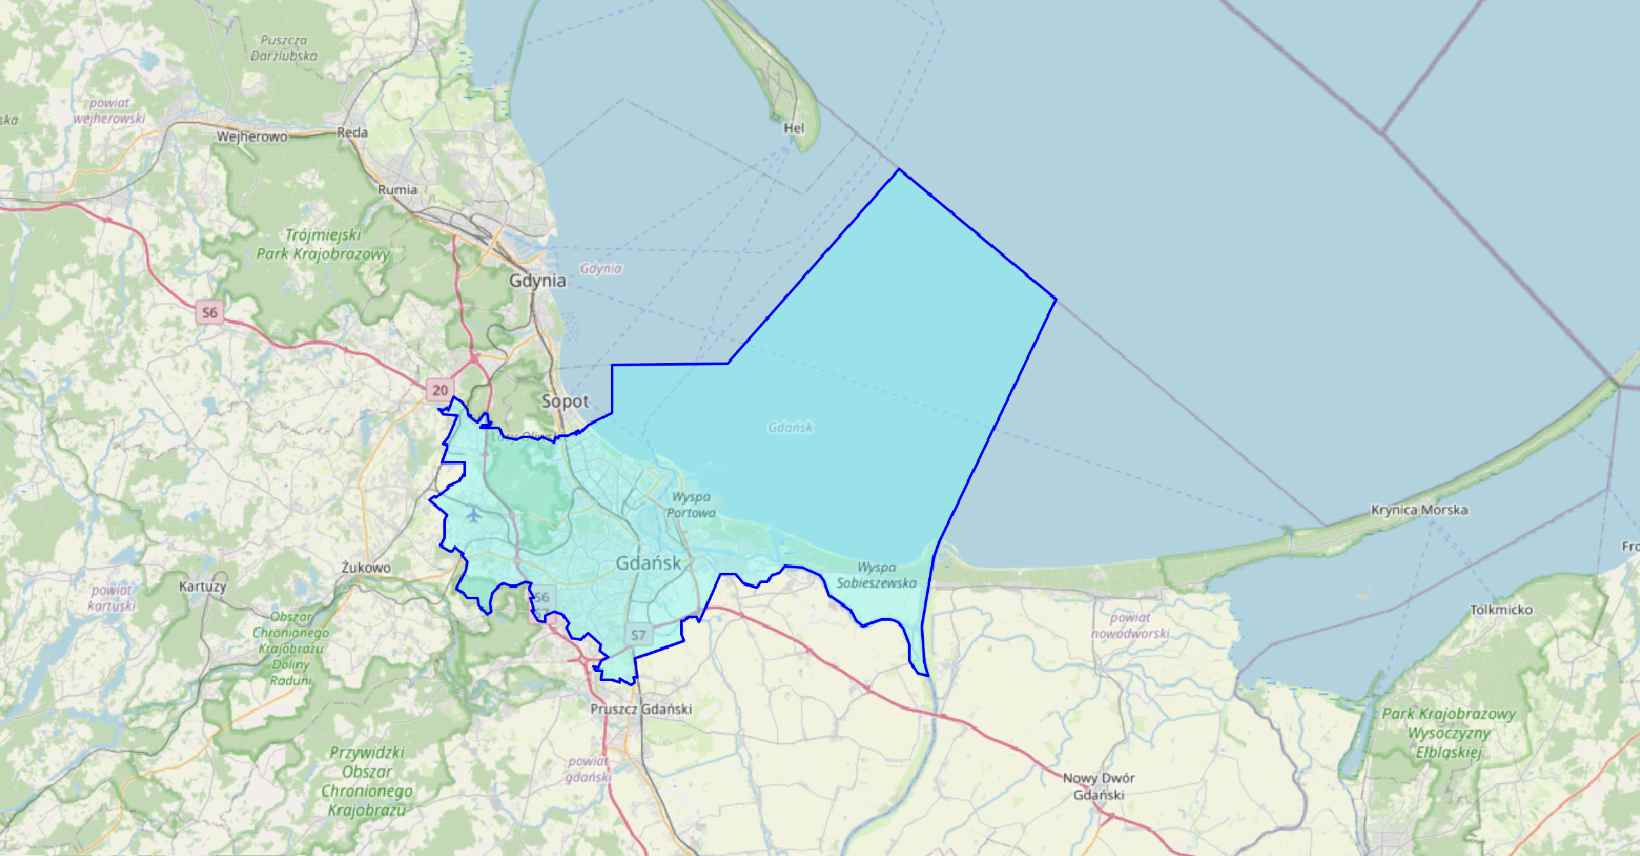

## Experimenting with different Geoapify endpoint

In [108]:
import requests
import folium
import pandas as pd

API_KEY = "75c3d3b386d541dc8513254d3ec79539"

# List of PPLA and PPLC cities
cities = ["Warsaw", "Gdańsk", "Kraków", "Łódź", "Wrocław", "Poznań"]  # Add more cities as needed

# Function to get city boundary using v2/place-details
def get_city_boundary(city_name):
    # Step 1: Get the Place ID for the city
    geocode_url = f"https://api.geoapify.com/v1/geocode/search?text={city_name}&type=city&format=json&apiKey={API_KEY}"
    response = requests.get(geocode_url)
    data = response.json()

    if "results" in data and len(data["results"]) > 0:
        place_id = data["results"][0]["place_id"]
    else:
        print(f"City {city_name} not found!")
        return None

    # Step 2: Fetch city boundary using v2/place-details
    boundary_url = f"https://api.geoapify.com/v2/place-details?id={place_id}&apiKey={API_KEY}"
    response = requests.get(boundary_url)
    boundary_data = response.json()

    if "features" in boundary_data and len(boundary_data["features"]) > 0:
        geometry = boundary_data["features"][0]["geometry"]
        if geometry["type"] == "MultiPolygon":
            polygons = [[(lat, lon) for lon, lat in poly[0]] for poly in geometry["coordinates"]]
        else:
            polygons = [[(lat, lon) for lon, lat in geometry["coordinates"][0]]]
        return polygons
    else:
        print(f"No boundary data found for {city_name}")
        return None

# Create map centered on Poland
borders_map = folium.Map(location=[52.0, 19.0], zoom_start=6)

# Store boundaries in a DataFrame
boundaries = []

# Fetch and overlay city boundaries
for city in cities:
    city_polygons = get_city_boundary(city)
    if city_polygons:
        for polygon in city_polygons:
            folium.Polygon(
                locations=polygon,
                color="blue",
                weight=2,
                fill=True,
                fill_color="cyan",
                fill_opacity=0.4,
                tooltip=city
            ).add_to(borders_map)
        boundaries.append({"City": city, "Polygons": city_polygons})

# Save boundaries as DataFrame
df_boundaries = pd.DataFrame(boundaries)

# Save and display the map
borders_map.save("poland_cities_boundaries.html")


## Fetching city borders for all selected cities

In [ ]:
import requests
import folium
import pandas as pd
import time

API_KEY = "75c3d3b386d541dc8513254d3ec79539"

# Filter cities that are PPLC, PPLA, or PPLA2
df_cities = df_pol[df_pol["feature_code"].isin(["PPLC", "PPLA", "PPLA2"])]

# Function to get city boundary using v2/place-details
def get_city_boundary(city_name):
    try:
        # Step 1: Get the Place ID for the city
        geocode_url = f"https://api.geoapify.com/v1/geocode/search?text={city_name}&type=city&format=json&apiKey={API_KEY}"
        response = requests.get(geocode_url)
        data = response.json()
        
        if "results" in data and len(data["results"]) > 0:
            place_id = data["results"][0]["place_id"]
        else:
            print(f"⚠️ City {city_name} not found!")
            return None

        # Step 2: Fetch city boundary using v2/place-details
        boundary_url = f"https://api.geoapify.com/v2/place-details?id={place_id}&apiKey={API_KEY}"
        response = requests.get(boundary_url)
        boundary_data = response.json()

        if "features" in boundary_data and len(boundary_data["features"]) > 0:
            geometry = boundary_data["features"][0]["geometry"]
            if geometry["type"] == "MultiPolygon":
                polygons = [[(lat, lon) for lon, lat in poly[0]] for poly in geometry["coordinates"]]
            else:
                polygons = [[(lat, lon) for lon, lat in geometry["coordinates"][0]]]
            return polygons
        else:
            print(f"⚠️ No boundary data found for {city_name}")
            return None
    except Exception as e:
        print(f"⚠️ Error fetching {city_name}: {e}")
        return None

# Create map centered on Poland
borders_map = folium.Map(location=[52.0, 19.0], zoom_start=6)

# Store boundaries in a DataFrame
boundaries = []

# Fetch and overlay city boundaries
for index, row in df_cities.iterrows():
    city_name = row["name"]
    print(f"🔍 Fetching boundary for: {city_name}...")

    city_polygons = get_city_boundary(city_name)
    
    if city_polygons:
        for polygon in city_polygons:
            folium.Polygon(
                locations=polygon,
                color="blue",
                weight=2,
                fill=True,
                fill_color="cyan",
                fill_opacity=0.4,
                tooltip=city_name
            ).add_to(borders_map)

        boundaries.append({"City": city_name, "Polygons": city_polygons})

    time.sleep(1)  # Avoid exceeding API rate limits

# Save boundaries as DataFrame
df_boundaries = pd.DataFrame(boundaries)

df_boundaries.to_csv('df_boundaries.csv')

# Save and display the map
borders_map.save("poland_cities_boundaries.html")


### Połaczenie mapy z df_pol oraz df_boundaries

In [ ]:
# Create map centered on Poland
borders_map = folium.Map(location=[52.0, 19.0], zoom_start=6)
df_cities = df_pol[df_pol["feature_code"].isin(["PPLC", "PPLA", "PPLA2"])].copy()
df_boundaries = pd.read_csv('df_boundaries.csv')

In [ ]:
# Merge only with PPLC, PPLA, and PPLA2
df_cities = df_cities.merge(df_boundaries, on="name", how="left")

# Filter out cities that were in df_cities from df_pol_copy
df_remaining = df_pol[~df_pol["feature_code"].isin(["PPLC", "PPLA", "PPLA2"])]

# Concatenate back the updated df_cities with the rest of df_pol_copy
df_pol = pd.concat([df_remaining, df_cities])

# Save the updated dataframe
df_pol.to_csv('df_pol_with_boundaries.csv', index=False)

# Save and display the map
borders_map.save("poland_cities_boundaries.html")

print("✅ Updated df_pol saved as 'df_pol_with_boundaries.csv'")
print("✅ Map saved as 'poland_cities_boundaries.html'")

## Mapowanie pinezek i granic

In [ ]:
import folium
import pandas as pd
import math
import ast

def get_marker_radius(population):
    if population is None or population <= 0:
        return 3
    if population < 1000:
        return 3
    elif population < 50000:
        return 3 + (population - 1000) / (50000 - 1000) * (8 - 3)
    elif population < 200000:
        return 8 + (population - 50000) / (200000 - 50000) * (12 - 8)
    else:
        return 12


def generate_map(df, output_html="map.html", draw_lines=False):
    """
    Generates a Folium map with:
      - A background layer for connection lines (if draw_lines is True)
      - Markers for each city (colored and sized by feature_code/population)
      - Polygons if available in the 'polygons' column
      - Optionally, if draw_lines is True, draws assigned connection lines 
        from non-metro towns to their assigned metros in a separate FeatureGroup.
    """
    # Build a lookup dictionary: geonameid -> (latitude, longitude)
    geonameid_to_coords = {}
    for _, row in df.iterrows():
        try:
            key = int(row["geonameid"])
        except ValueError:
            continue
        geonameid_to_coords[key] = (row["latitude"], row["longitude"])
    
    # Create the base map, centered on the average lat/lon
    mean_lat = df["latitude"].mean()
    mean_lon = df["longitude"].mean()
    m = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)

    
    # Plot markers and polygons for each city.
    for idx, row in df.iterrows():
        lat = row["latitude"]
        lon = row["longitude"]
        feature_code = str(row["feature_code"])
        name = row["name"]
        population = row.get("population", 0)
        admin1_code = row.get("admin1_code", "")
        admin2_code = row.get("admin2_code", "")
        admin3_code = row.get("admin3_code", "")
        
        # Determine marker color
        if feature_code.startswith("PPLA"):
            color = "red"
        elif feature_code == "PPLC":
            color = "green"
        else:
            color = "blue"
        
        radius_value = get_marker_radius(population)
        
        # Build basic tooltip text.
        tooltip_text = (
            f"City: {name}<br>"
            f"Population: {population}<br>"
            f"Feature: {feature_code}<br>"
            f"Admin1: {admin1_code}, Admin2: {admin2_code}, Admin3: {admin3_code}"
        )
        
        # Add the marker.
        folium.CircleMarker(
            location=[lat, lon],
            radius=radius_value,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.8,
            tooltip=tooltip_text
        ).add_to(m)
        
        # Overlay polygons if present.
        polygons = row.get("polygons", None)
        if isinstance(polygons, list) and len(polygons) > 0:
            for poly in polygons:
                folium.Polygon(
                    locations=poly,
                    color="cyan",
                    weight=2,
                    fill=True,
                    fill_color="yellow",
                    fill_opacity=0.3,
                    tooltip=tooltip_text
                ).add_to(m)
    
    m.save(output_html)
    print(f"Map saved to {output_html}")


def safe_parse_polygons(val):
    """
    Safely parse the 'polygons' column from the CSV.
    Returns a list of polygon coordinates or an empty list if parsing fails.
    """
    # If it's NaN or empty
    if pd.isna(val):
        return []
    # If it's already a list (rare in CSV, but possible if it was saved in some way)
    if isinstance(val, list):
        return val
    # If it's a string, try literal_eval
    if isinstance(val, str):
        try:
            parsed = ast.literal_eval(val)
            # Ensure parsed is a list of polygon coords
            if isinstance(parsed, list):
                return parsed
            else:
                return []
        except Exception:
            return []
    # If none of the above, return empty
    return []

if __name__ == "__main__":
    df = pd.read_csv(
        "data/processed/final_with_metropolis_assignment.csv",
        converters={
            "polygons": safe_parse_polygons
        }
    )

    # Generate the map with draw_lines enabled.
    generate_map(df, output_html="data/cities_map_nolines.html")


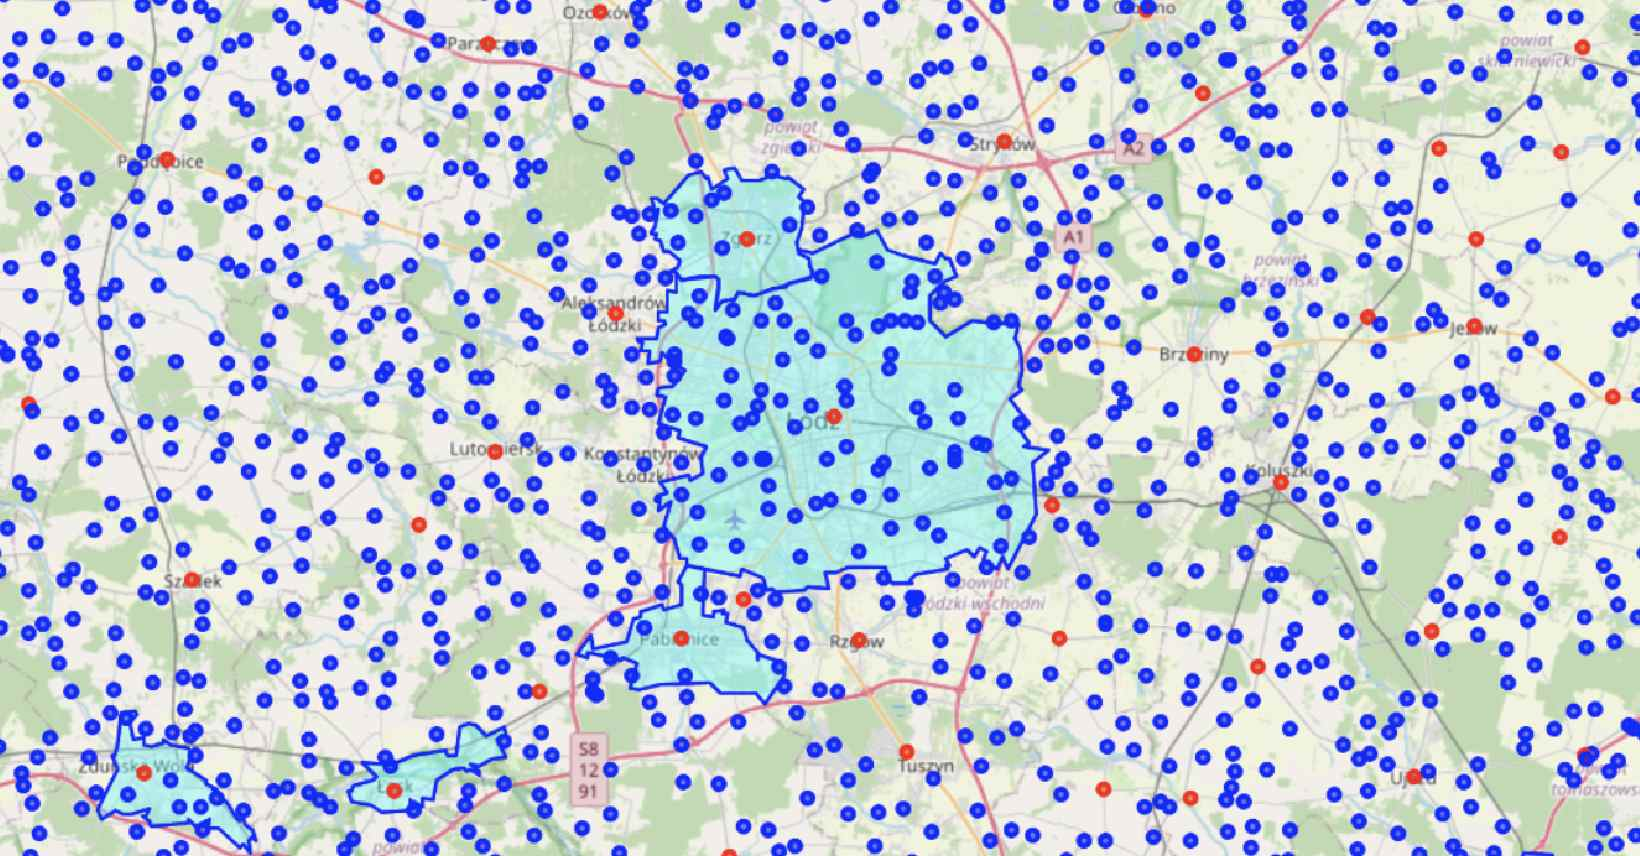

## Usuwanie pinezek w obrebie granic

In [ ]:
# scripts/remove_nested_points.py

import os
import sys
import pandas as pd

# Make sure Python can see the src folder
BASE_DIR = os.path.dirname(os.path.dirname(__file__))
sys.path.append(BASE_DIR)

from src.pipeline.polygon_utils import create_multipolygon_from_borders, filter_points_outside_polygons


# 1. Read the CSV with boundaries, e.g. final_PL_with_boundaries.csv
csv_path = os.path.join(BASE_DIR, "data", "processed", "final_PL_with_boundaries.csv")
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} rows from {csv_path}")

# 2. Split into df_borders (has polygons) and df_rest
df_borders = df[df["polygons"].notna()].copy()
df_rest = df[df["polygons"].isna()].copy()
print(f"{len(df_borders)} rows have polygon data.")
print(f"{len(df_rest)} rows have no polygon data.")

# 3. Create a MultiPolygon
mpoly = create_multipolygon_from_borders(df_borders)

# 4. Filter out df_rest points that are inside polygons
df_rest_filtered = filter_points_outside_polygons(df_rest, mpoly)
print(f"{len(df_rest_filtered)} rows remain after removing those inside polygons.")

# 5. Combine them back if you like, or just keep df_rest_filtered
df_final = pd.concat([df_borders, df_rest_filtered], ignore_index=True)
print(f"Final DataFrame has {len(df_final)} rows.")

# 6. Save result
output_path = os.path.join(BASE_DIR, "data", "processed", "final_without_nested.csv")
df_final.to_csv(output_path, index=False)
print(f"Saved final data to {output_path}")



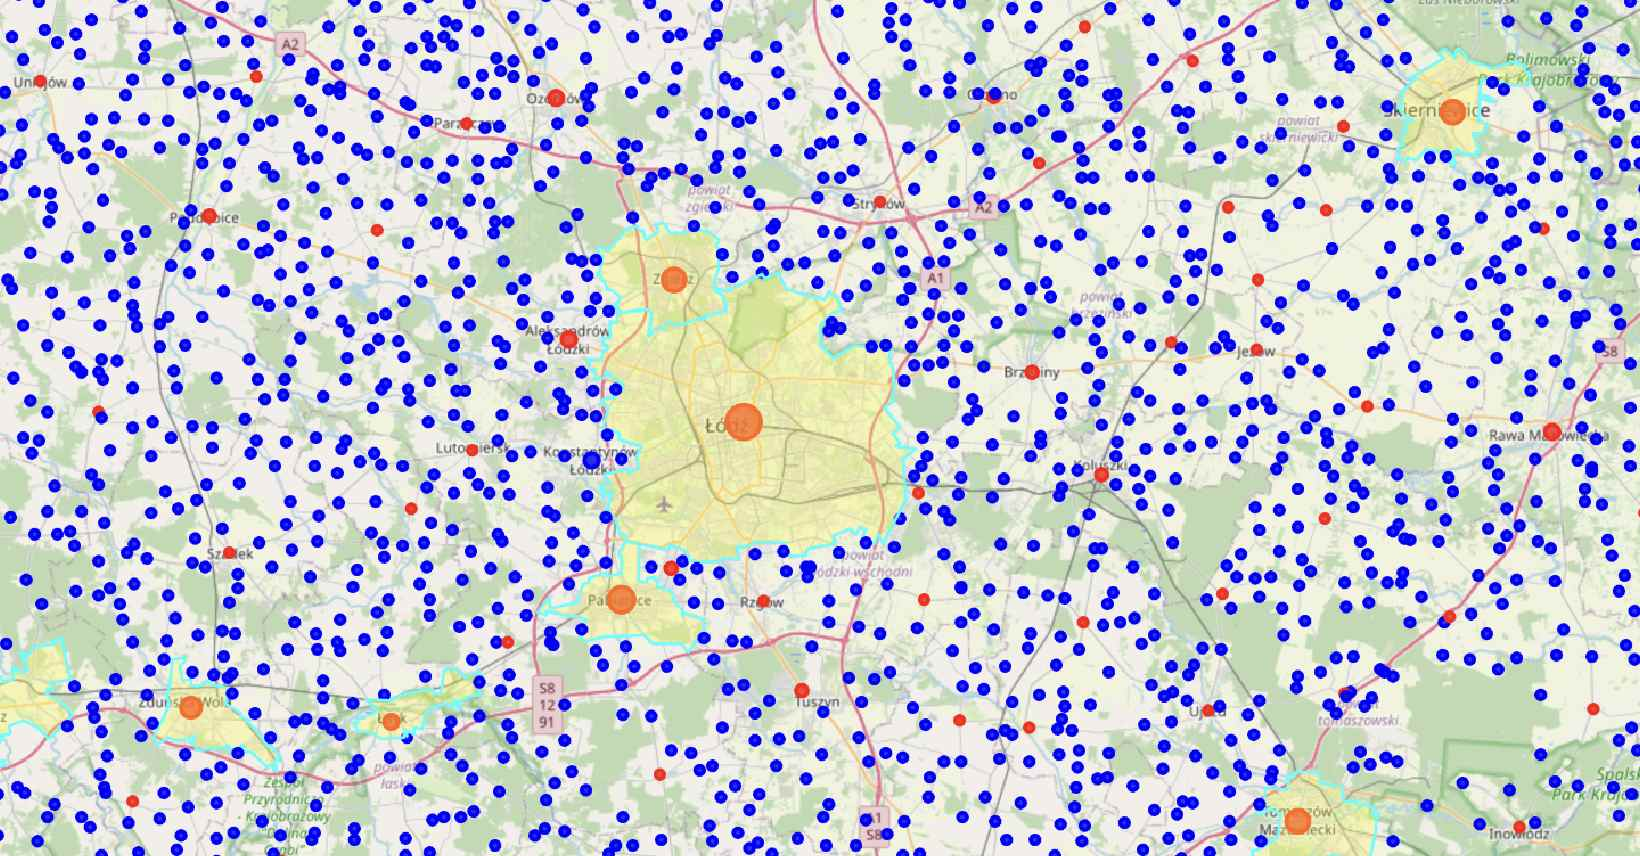